<a href="https://colab.research.google.com/github/RevazRevazashvili/DataScience_learning/blob/main/most_requested_jobs_based_on_jobsge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Getting web page

In [155]:
url = 'https://www.jobs.ge/?page=1&q=&cid=6&lid=1&jid='

response = requests.get(url)

try:
  response
  print('succes')
except Exception as er:
  print(er)

page = BeautifulSoup(response.text, 'html.parser')

succes


# Data procesing and storying in DataFrame

In [156]:
table = page.find_all('a', class_ = 'vip')
table1 = page.find('div', class_ = 'regularEntries')

In [157]:
tds = table1.find_all('td')

In [158]:
companyes = []
for i in range(3,len(tds),6):
  companyes.append(tds[i].text.strip())

In [159]:
job_titles = []
for row in range(len(table)):
  job_titles.append(table[row].text)

In [160]:
df = pd.DataFrame()

In [161]:
df['job_titles'] = job_titles
df['companyes'] = companyes

In [162]:
df.head()

,job_titles,companyes
0,უმცროსი UI/UX დიზაინერი,HawX
1,IT პროექტების მენეჯერი,RSM Georgia
2,IT სერვისების ადმინისტრირების სპეციალისტი,ევექსი კლინიკები
3,უფროსი მონაცემთა ინჟინერი,Data and Operational Excellence Hub
4,უფროსი Backend/Full-Stack PHP Software ინჟინერი,Data and Operational Excellence Hub


# data analyzing

In [163]:
jobs = {}
for job in df['job_titles']:
  if job in jobs.keys():
    jobs[job] += 1
    continue
  else:
    jobs[job] = 1
employer = {}
for job in df['companyes']:
  if job in employer.keys():
    employer[job] += 1
    continue
  else:
    employer[job] = 1

In [164]:
len(employer)

102

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


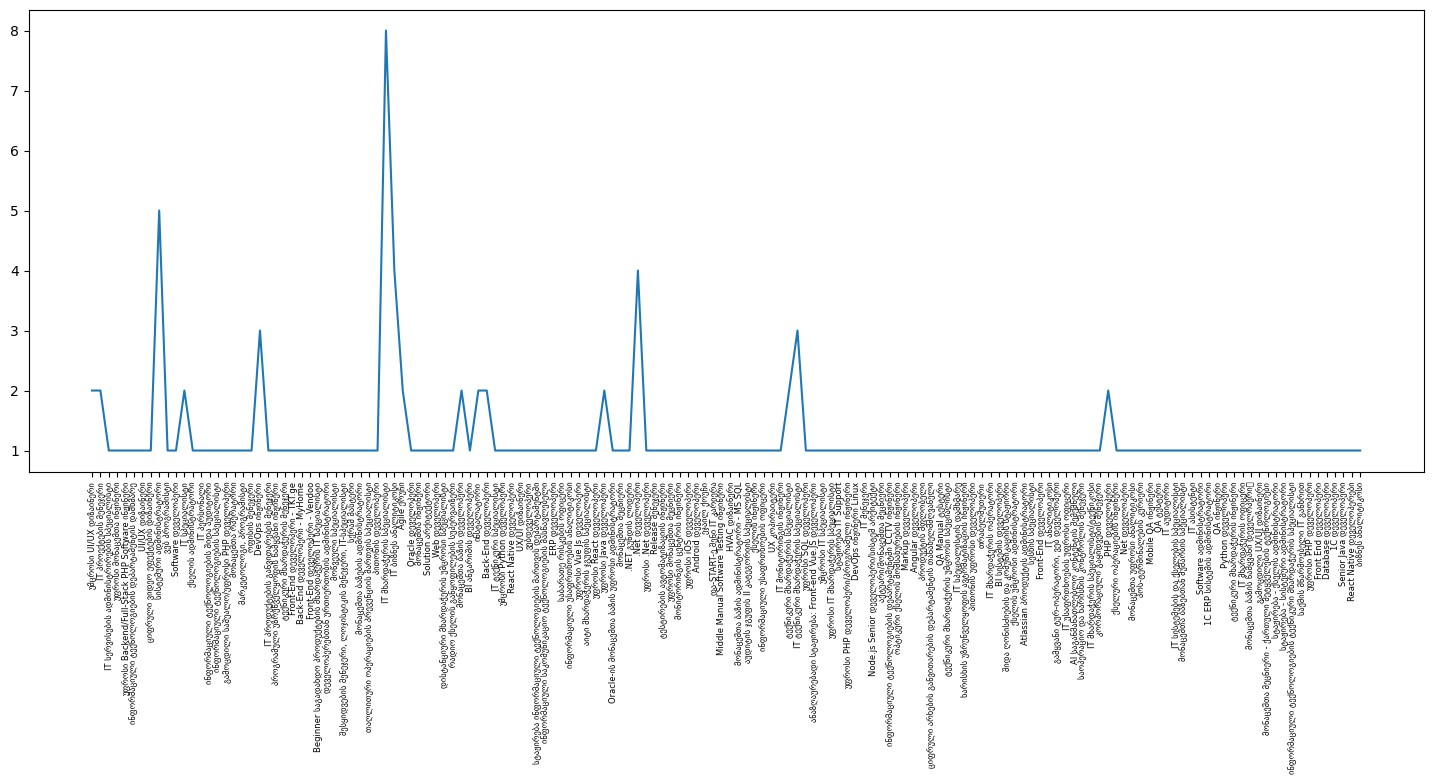

In [165]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(jobs.keys(), jobs.values())
plt.xticks(rotation='vertical', fontsize=6)
plt.show()

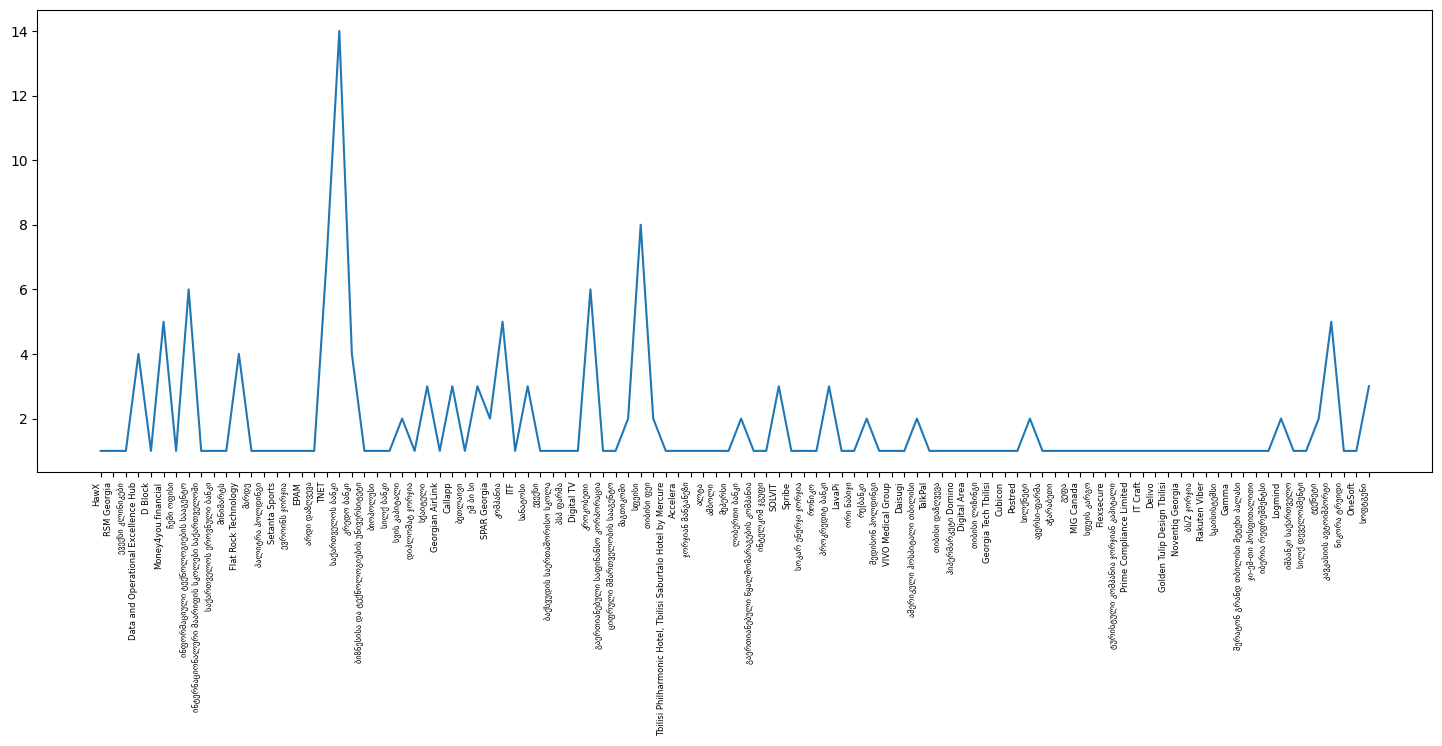

In [166]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(employer.keys(), employer.values())
plt.xticks(rotation='vertical', fontsize=6, ha='right', va='top')
plt.show()

# most common jobs and employers

In [167]:
jobs = dict((k, v) for k, v in jobs.items() if v > 1)

In [168]:
employer = dict((k, v) for k, v in employer.items() if v > 1)

In [169]:
jobs, employer

({'უმცროსი UI/UX დიზაინერი': 2,
  'IT პროექტების მენეჯერი': 2,
  'სისტემური ადმინისტრატორი': 5,
  'IT სპეციალისტი': 2,
  'DevOps ინჟინერი': 3,
  'IT მხარდაჭერის სპეციალისტი': 8,
  'IT ბიზნეს ანალიტიკოსი': 4,
  'Agile ქოუჩი': 2,
  'მონაცემთა ბაზის დეველოპერი': 2,
  'ინსტალატორი': 2,
  'Back-End დეველოპერი': 2,
  'უფროსი Java დეველოპერი': 2,
  '.Net დეველოპერი': 4,
  'ტექნიკური მხარდაჭერის სპეციალისტი': 2,
  'IT ტექნიკური მხარდაჭერის სპეციალისტი': 3,
  'PHP დეველოპერი': 2},
 {'Data and Operational Excellence Hub': 4,
  'Money4you.financial': 5,
  'ინფორმაციული ტექნოლოგიების სააგენტო': 6,
  'Flat Rock Technology': 4,
  'TNET': 7,
  'საქართველოს ბანკი': 14,
  'კრედო ბანკი': 4,
  'სვის კაპიტალი': 2,
  'სქაიტელი': 3,
  'Callapp': 3,
  'ემ ბი სი': 3,
  'SPAR Georgia': 2,
  'კომპანია': 5,
  'სანატოსი': 3,
  'კროკობეთი': 6,
  'მაგთიკომი': 2,
  'სფეისი': 8,
  'თიბისი ფეი': 2,
  'ლიბერთი ბანკი': 2,
  'SOLVIT': 3,
  'პროკრედიტ ბანკი': 3,
  'რე|ბანკი': 2,
  'ამერიკული ჰოსპიტალი თბილისი': 2,
  'სილქ

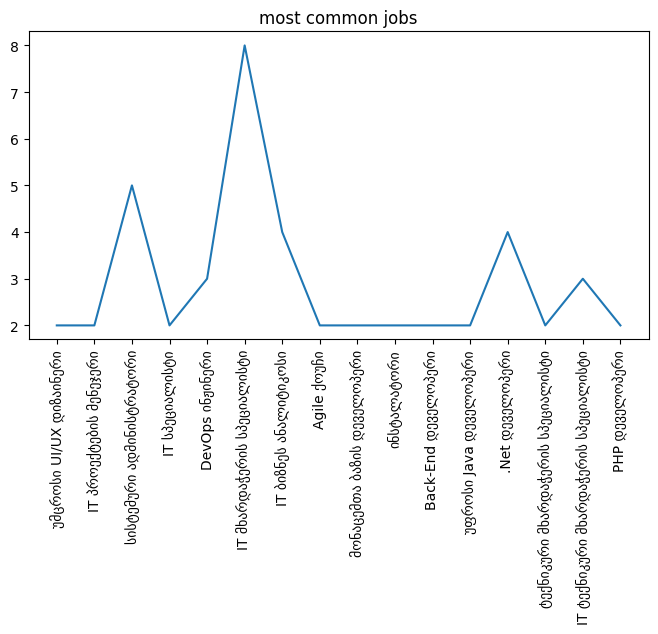

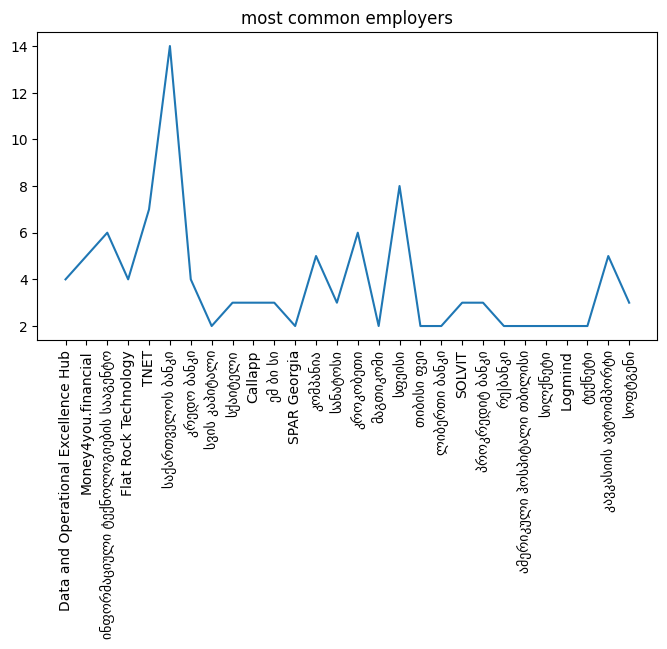

In [214]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(jobs.keys(), jobs.values())
plt.xticks(rotation='vertical')
plt.title("most common jobs")
plt.show()
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(employer.keys(), employer.values())
plt.xticks(rotation='vertical')
plt.title("most common employers")
plt.show()